In [1]:
# This uses the citipy 0.0.5 library found at
# https://pypi.org/project/citipy
# (but actually I think it just uses worldcities.csv from citypi's GitHub)
# as well as the OpenWeatherMap API found at
# https://openweathermap.org/api
# print("https://openweathermap.org/api")

# Dependencies
from config import api_key
import csv
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import requests
from scipy import stats
from scipy.stats import linregress
import time

# base URL
baseURL = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# assign city a city to test with:
city = "Mumbai"

# Build partial query URL
queryURL = f"{baseURL}appid={api_key}&units={units}&q="
# test searching something at openweather.org
# print(queryURL+city)

# test what comes back from JSON
response = requests.get(queryURL + city).json()
# print(json.dumps(response, indent=4, sort_keys=True))

# Now test populating a list of cities by hand:
# cities = ["Mumbai", "Reykjavik"]
cities = []

In [2]:
# read worldcities.csv
worldCitiesFilepath = "../Resources/worldcities.csv"
# Is encoding an issue here?
# worldCities = pd.read_csv(worldCitiesFilepath, encoding="iso-8859-1")
worldCities = pd.read_csv(worldCitiesFilepath)
# worldCities
# Country | City | Latitude | Longitude

# How many cities are there in this list?
cityListLength = len(worldCities)
# cityListLength

# Test choosing a random number from 1 to cityListLength
# randomCityNumber = random.randint(0, cityListLength+1)
# randomCityNumber
worldCities

,Country,City,Latitude,Longitude
0,ad,andorra la vella,42.500000,1.516667
1,ad,canillo,42.566667,1.600000
2,ad,encamp,42.533333,1.583333
3,ad,la massana,42.550000,1.516667
4,ad,les escaldes,42.500000,1.533333
...,...,...,...,...
46827,zw,redcliffe,-19.033333,29.783333
46828,zw,rusape,-18.533333,32.116667
46829,zw,shurugwi,-19.666667,30.000000
46830,zw,victoria falls,-17.933333,25.833333


In [3]:
#Generate a limit-long list of cities at random from worldCities
cityNumber = 0
limit = 600
cities = []

# print(cities)
# print(citiesDF)
# print(thisCityDF)

randomCityNumber = random.sample(range(cityListLength),limit)
cities = worldCities.iloc[randomCityNumber, [1]]
    # append city, lat, and long to their respective lists:
    # cities.append(city)
    # cityNumber += 1
    # print(city[0])
# print(randomCityNumber)
cities

,City
5755,foumban
21352,honjo
4943,saint-felicien
43138,wilmington island
24179,nava
...,...
16857,aklera
27250,bal-os
27468,bitaogan
10484,marjamaa


In [4]:
print(len(cities))

600


In [5]:
# set up lists to hold response info:
lat = []
long = []
temp = []
RH = []
cloudy = []
windSpeed = []
# create query URL
queryURL = f"{baseURL}appid={api_key}&units={units}&q="    
cityCount = 0

# Loop through the list of cities and perform a request for data on each
for city in cities["City"]:
    # print(city)
    try:
        response = requests.get(queryURL + city).json()
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        temp.append(response["main"]["temp"])
        RH.append(response["main"]["humidity"])
        cloudy.append(response["clouds"]["all"])    
        windSpeed.append(response["wind"]["speed"])
        print(f"{cities.index[cityCount]} {city.title()}")
        time.sleep(0.5)
        cityCount += 1
    except:
        print("Sorry, couldn't find that city.")

5755 Foumban
21352 Honjo
4943 Saint-Felicien
43138 Wilmington Island
24179 Nava
43823 Rossville
21176 Bayt Yafa
29666 Romblon
11649 Grigny
21750 Sawara
28734 Lucsuhin
25418 Rosita
25719 Voorst
23046 Erdenet
19120 Rajauri
23131 Arsenal
24528 Soto La Marina
3738 Prata
12680 Kippen
8154 Nove Hrady
6387 Wenshang
18228 Kharagpur
27126 Bacolod
265 Hnaberd
45952 Richmond
41681 Rzhyshchiv
10649 Alcazar De San Juan
683 Murzzuschlag
3320 Manhumirim
7462 Tipacoque
45347 Anasco
2913 Franco Da Rocha
8877 Geesthacht
4577 Disraeli
4333 Maunatlala
35828 Filimonovo
43658 Waggaman
Sorry, couldn't find that city.
13945 Cannock
12373 Mabua
28806 Itajai
3094 Parabiago
20750 Bac Ninh
46394 Witham
13058 Thap Khlo
40318 Alegre
2287 Khorlovo
36310 Ambah
16902 Radomir
2038 Gagny
11623 Zavoaia
34793 Bungoy
27597 Zutendaal
1848 Lukovetskiy
36873 Ishioka
21392 Coloso
6762 Kayankulam
18189 Naigarhi
18728 Kitzbuhel
645 Garh Maharaja
30762 Arzakan
187 Tecamac
24585 Minuri
29147 San Jacinto
29855 Peachtree City
43107 

40745 Norre Alslev
13232 Severnyy-Kospashskiy
44317 Titagarh
9464 Capandanan
33313 Tanza
1722 Kings Point
27105 Sary-Tyuz
39171 Martinis
43679 Sopron
39213 Bouc-Bel-Air
39136 Kybartai
20665 Vikindu
42284 Topalu
36752 Maliq
26482 Frederiksberg
26648 Kawasaki
8685 Toluca
11619 Igarape
26188 Reckange
10086 Ngaglik
38059 Weil Im Schonbuch
19634 Troitskoye
27814 Hirosaki
30428 Serekunda
42879 Pryshyb
37996 Khorosheve
33526 Morlaix
15987 Biscarrosse
11437 San Salvador
22395 San Enrique
41116 Guapiacu
34511 Brasy
115 Singojuruh
9971 Macaravita
21476 Babino
24770 Abyek
3019 Zorak
22570 Valencia
16405 Mombaca
9822 Malaya
38602 Losinyy
21340 Kirksville
13251 Catabola
41643 Gouvy
41344 Gramesti
11858 Mococa
11420 Flers
32006 Vila Do Maio
29796 Mercedes
2956 Grasse
7846 Corbu
16501 Martorell
7030 Saint-Tite
35248 Pipirig
19833 Shangqiu
425 Kranj
46383 Calixtlahuaca
3410 Tlahuelilpan
Sorry, couldn't find that city.
28921 Pipri
36855 Biloli
44300 Livadi
446 Mulgund
1523 Somerton
33190 Wakkanai
3404 

In [6]:
# The first requirement is to create a series of scatter plots
# to showcase the following relationships:

# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

# After each plot, add a sentence or two explaining
# what the code is analyzing.

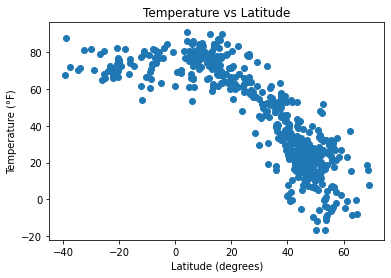

The code is analyzing what the latitude of each place is and what temperature it currently is at that place.
-Temperature increases nearer the equator.
-Temperature decreases near the poles.
-There are more locations in the Northern Hemisphere than Southern.
-Location in the Northern Hemisphere extend much closer to the North Pole than locations in the Southern Hemisphere do the South Pole.


In [23]:
# Read the list lat into xValues and the list temp into yValues:
# (Note: Don't read lat into xValues again.)
xValues = lat
yValues = temp

# Create a scatterplot for temperature vs latitude
plt.scatter(xValues,yValues)
plt.title("Temperature vs Latitude")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Temperature (\N{DEGREE SIGN}F)")
plt.savefig("TempLat.png")
plt.show()

print("The code is analyzing what the latitude of each place is and what temperature it currently is at that place.\n-Temperature increases nearer the equator.\n-Temperature decreases near the poles.\n-There are more locations in the Northern Hemisphere than Southern.\n-Location in the Northern Hemisphere extend much closer to the North Pole than locations in the Southern Hemisphere do the South Pole.")

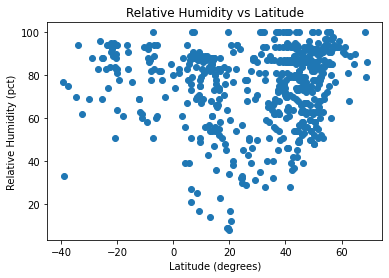

The code is analyzing what the latitude of each place is and what the relative humidity currently is at that place. No trend is presently clear.


In [24]:
# Create a scatterplot for RH vs latitude
yValues = RH

plt.scatter(xValues, yValues)
plt.title("Relative Humidity vs Latitude")
plt.xlabel('Latitude (degrees)')
plt.ylabel('Relative Humidity (pct)')
plt.savefig("RHLat.png")
plt.show()

print("The code is analyzing what the latitude of each place is and what the relative humidity currently is at that place. No trend is presently clear.")

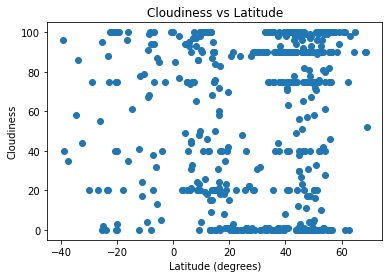

The code is analyzing what the latitude of each place is and how cloudy it currently is at that place. No trend is presently clear.


In [25]:
# Create a scatterplot for cloudiness vs latitude
yValues = cloudy

plt.scatter(xValues, yValues)
plt.title("Cloudiness vs Latitude")
plt.xlabel('Latitude (degrees)')
plt.ylabel('Cloudiness')
plt.savefig("CloudLat.png")
plt.show()

print("The code is analyzing what the latitude of each place is and how cloudy it currently is at that place. No trend is presently clear.")

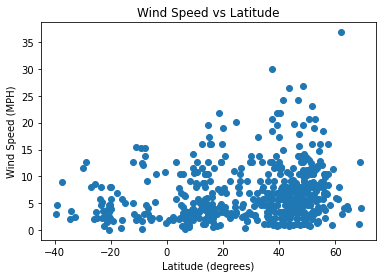

The code is analyzing what the latitude of each place is and the most recently measured wind speed at that place. No trend is presently clear.


In [26]:
# Create a scatterplot for windiness vs latitude
yValues = windSpeed

plt.scatter(xValues, yValues)
plt.title("Wind Speed vs Latitude")
plt.xlabel('Latitude (degrees)')
plt.ylabel('Wind Speed (MPH)')
plt.savefig("WindLat.png")
plt.show()

print("The code is analyzing what the latitude of each place is and the most recently measured wind speed at that place. No trend is presently clear.")

In [27]:
# I can create a dataframe of the results I got, to avoid querying the website again: 
weatherData = {
    "Latitude": lat,
    "Longitude": long,
    "Temperature": temp,
    "Relative Humidity": RH,
    "Cloudiness": cloudy,
    "Wind Speed": windSpeed
    }

# data = {'First Column Name':  ['First value', 'Second value',...],
#         'Second Column Name': ['First value', 'Second value',...],
#          ....
#        }

weatherDataDF = pd.DataFrame(weatherData)

# df = pd.DataFrame (data, columns = ['First Column Name','Second Column Name',...])
weatherDataDF

,Latitude,Longitude,Temperature,Relative Humidity,Cloudiness,Wind Speed
0,5.7291,10.9001,65.98,39,93,4.36
1,36.2333,139.1833,41.00,69,0,4.00
2,48.6501,-72.4491,6.76,66,40,2.30
3,32.0036,-80.9737,45.55,93,90,6.91
4,28.4167,-100.7667,35.87,87,90,9.22
...,...,...,...,...,...,...
574,24.4167,76.5667,62.55,30,0,4.32
575,9.4416,122.6257,79.79,78,100,3.85
576,6.7684,126.0774,77.00,100,75,3.44
577,58.9039,24.4306,27.00,96,94,1.01


In [28]:
# export weatherDataDF as a CSV
weatherDataDF.to_csv("weatherDataDF.csv")

In [29]:
# The second requirement is to run linear regression on each relationship.
# This time, separate the plots into
# Northern Hemisphere (greater than or equal to 0 degrees latitude) and
# Southern Hemisphere (less than 0 degrees latitude):

In [30]:
NoHemWeatherDataDF = weatherDataDF.loc[weatherDataDF.Latitude >= 0, :]
NoHemWeatherDataDF

,Latitude,Longitude,Temperature,Relative Humidity,Cloudiness,Wind Speed
0,5.7291,10.9001,65.98,39,93,4.36
1,36.2333,139.1833,41.00,69,0,4.00
2,48.6501,-72.4491,6.76,66,40,2.30
3,32.0036,-80.9737,45.55,93,90,6.91
4,28.4167,-100.7667,35.87,87,90,9.22
...,...,...,...,...,...,...
572,47.9500,26.8667,23.16,73,75,13.80
574,24.4167,76.5667,62.55,30,0,4.32
575,9.4416,122.6257,79.79,78,100,3.85
576,6.7684,126.0774,77.00,100,75,3.44


In [31]:
SoHemWeatherDataDF = weatherDataDF.loc[weatherDataDF.Latitude < 0, :]
SoHemWeatherDataDF

,Latitude,Longitude,Temperature,Relative Humidity,Cloudiness,Wind Speed
15,-20.1056,57.5353,75.85,94,75,4.61
17,-19.3072,-48.9242,72.64,78,100,1.74
28,-20.3578,-41.9581,69.80,88,100,2.30
31,-23.3217,-46.7269,70.09,94,20,4.61
34,-22.5970,27.6301,71.53,84,100,3.53
...,...,...,...,...,...,...
566,-8.9000,33.4500,60.35,92,91,0.29
568,-22.1158,-46.6828,66.94,91,100,2.62
571,-23.0744,-44.9597,69.80,94,75,2.30
573,-17.7333,-63.4333,81.50,61,20,6.91


In [32]:
NxValues = NoHemWeatherDataDF.loc[:, "Latitude"]
SxValues = SoHemWeatherDataDF.loc[:, "Latitude"]
Nn = len(NxValues)
Sn = len(SxValues)

# a
# Northern Hemisphere - Temperature (F) vs. Latitude
# Southern Hemisphere - Temperature (F) vs. Latitude

# b
# Northern Hemisphere - Humidity (%) vs. Latitude
# Southern Hemisphere - Humidity (%) vs. Latitude

# c
# Northern Hemisphere - Cloudiness (%) vs. Latitude
# Southern Hemisphere - Cloudiness (%) vs. Latitude

# d
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
# Southern Hemisphere - Wind Speed (mph) vs. Latitude

# After each pair of plots, take the time to explain 
# what the linear regression is modeling.
# For example, describe any relationships you notice and 
# any other analysis you may have.

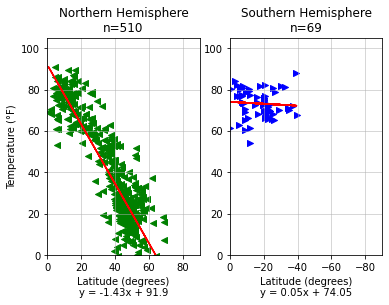

These linear regressions are modelling that temperature increases the closer to the equator a location is. This is unsurprising.


In [33]:
# a Create scatterplots for temperature vs latitude in Northern and Southern Hemispheres

# Set height of y axis in both graphs
yLimMax = 105

# create a set of subplots one row tall x two columns wide 
plt.subplots(1,2)

NyValues = NoHemWeatherDataDF.loc[:, "Temperature"]
plt.subplot(1, 2, 1)
plt.scatter(NxValues, NyValues, marker="<", color="green")
plt.xlim(0, 90)
plt.ylim(0, yLimMax)
plt.title(f"Northern Hemisphere\nn={Nn}")
plt.ylabel("Temperature (\N{DEGREE SIGN}F)")
plt.grid(axis = "x", linewidth = 0.5)
plt.grid(axis = "y", linewidth = 0.5)

# now do linear regression
(Nslope, Nintercept, Nrvalue, Npvalue, Nstderr) = linregress(NxValues, NyValues)
Nline_eq = "y = " + str(round(Nslope,2)) + "x + " + str(round(Nintercept,2))
plt.xlabel(f"Latitude (degrees)\n{Nline_eq}")
Nregress_values = np.asarray(Nslope) * NxValues + Nintercept
plt.plot(NxValues,Nregress_values,"r-")

SyValues = SoHemWeatherDataDF.loc[:, "Temperature"]
plt.subplot(1, 2, 2)
plt.scatter(SxValues, SyValues, marker=">", color="blue")
plt.xlim(0, -90)
plt.ylim(0, yLimMax)
plt.title(f"Southern Hemisphere\nn={Sn}")
plt.grid(axis = "x", linewidth = 0.5)
plt.grid(axis = "y", linewidth = 0.5)

# now do linear regression
(Sslope, Sintercept, Srvalue, Spvalue, Sstderr) = linregress(SxValues, SyValues)
Sline_eq = "y = " + str(round(Sslope,2)) + "x + " + str(round(Sintercept,2))
plt.xlabel(f"Latitude (degrees)\n{Sline_eq}")
Sregress_values = np.asarray(Sslope) * SxValues + Sintercept
plt.plot(SxValues,Sregress_values,"r-")

#and show the whole thing
plt.savefig("TempLatNoSoHemispheres.png")
plt.show()
print("These linear regressions are modelling that temperature increases the closer to the equator a location is. This is unsurprising.")

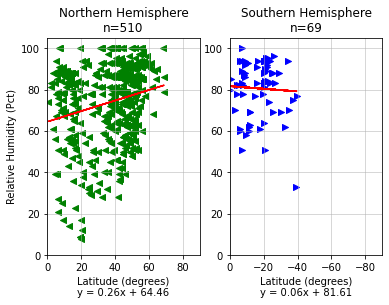

These linear regressions are modelling that relative humidity decreases the closer to the equator a location is. This is surprising.


In [34]:
# b Create scatterplots for humidity vs latitude in Northern and Southern Hemispheres

# Set height of y axis in both graphs
yLimMax = 105

# create a set of subplots one row tall x two columns wide 
plt.subplots(1,2)

NyValues = NoHemWeatherDataDF.loc[:, "Relative Humidity"]
plt.subplot(1, 2, 1)
plt.scatter(NxValues, NyValues, marker="<", color="green")
plt.xlim(0, 90)
plt.ylim(0, yLimMax)
plt.title(f"Northern Hemisphere\nn={Nn}")
plt.ylabel("Relative Humidity (Pct)")
plt.grid(axis = "x", linewidth = 0.5)
plt.grid(axis = "y", linewidth = 0.5)

# now do linear regression
(Nslope, Nintercept, Nrvalue, Npvalue, Nstderr) = linregress(NxValues, NyValues)
Nline_eq = "y = " + str(round(Nslope,2)) + "x + " + str(round(Nintercept,2))
plt.xlabel(f"Latitude (degrees)\n{Nline_eq}")
Nregress_values = np.asarray(Nslope) * NxValues + Nintercept
plt.plot(NxValues,Nregress_values,"r-")

SyValues = SoHemWeatherDataDF.loc[:, "Relative Humidity"]
plt.subplot(1, 2, 2)
plt.scatter(SxValues, SyValues, marker=">", color="blue")
plt.xlim(0, -90)
plt.ylim(0, yLimMax)
plt.title(f"Southern Hemisphere\nn={Sn}")
plt.grid(axis = "x", linewidth = 0.5)
plt.grid(axis = "y", linewidth = 0.5)

# now do linear regression
(Sslope, Sintercept, Srvalue, Spvalue, Sstderr) = linregress(SxValues, SyValues)
Sline_eq = "y = " + str(round(Sslope,2)) + "x + " + str(round(Sintercept,2))
plt.xlabel(f"Latitude (degrees)\n{Sline_eq}")
Sregress_values = np.asarray(Sslope) * SxValues + Sintercept
plt.plot(SxValues,Sregress_values,"r-")

#and show the whole thing
plt.savefig("RHLatNoSoHemispheres.png")
plt.show()
print("These linear regressions are modelling that relative humidity decreases the closer to the equator a location is. This is surprising.")

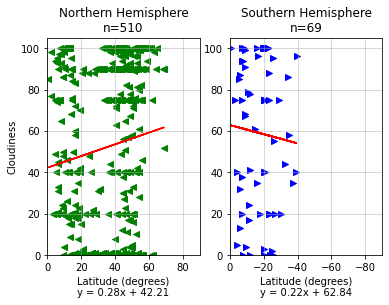

These linear regressions are modelling that cloudiness increases slightly the closer to the equator a location is in the Northern Hemisphere, but decreases strongly the closer to the equator a location is in the Southern Hemisphere.


In [35]:
# c Create scatterplots for cloudiness vs latitude in Northern and Southern Hemispheres

# Set height of y axis in both graphs
yLimMax = 105

# create a set of subplots one row tall x two columns wide 
plt.subplots(1,2)

NyValues = NoHemWeatherDataDF.loc[:, "Cloudiness"]
plt.subplot(1, 2, 1)
plt.scatter(NxValues, NyValues, marker="<", color="green")
plt.xlim(0, 90)
plt.ylim(0, yLimMax)
plt.title(f"Northern Hemisphere\nn={Nn}")
plt.ylabel("Cloudiness")
plt.grid(axis = "x", linewidth = 0.5)
plt.grid(axis = "y", linewidth = 0.5)

# now do linear regression
(Nslope, Nintercept, Nrvalue, Npvalue, Nstderr) = linregress(NxValues, NyValues)
Nline_eq = "y = " + str(round(Nslope,2)) + "x + " + str(round(Nintercept,2))
plt.xlabel(f"Latitude (degrees)\n{Nline_eq}")
Nregress_values = np.asarray(Nslope) * NxValues + Nintercept
plt.plot(NxValues,Nregress_values,"r-")

SyValues = SoHemWeatherDataDF.loc[:, "Cloudiness"]
plt.subplot(1, 2, 2)
plt.scatter(SxValues, SyValues, marker=">", color="blue")
plt.xlim(0, -90)
plt.ylim(0, yLimMax)
plt.title(f"Southern Hemisphere\nn={Sn}")
plt.grid(axis = "x", linewidth = 0.5)
plt.grid(axis = "y", linewidth = 0.5)

# now do linear regression
(Sslope, Sintercept, Srvalue, Spvalue, Sstderr) = linregress(SxValues, SyValues)
Sline_eq = "y = " + str(round(Sslope,2)) + "x + " + str(round(Sintercept,2))
plt.xlabel(f"Latitude (degrees)\n{Sline_eq}")
Sregress_values = np.asarray(Sslope) * SxValues + Sintercept
plt.plot(SxValues,Sregress_values,"r-")

#and show the whole thing
plt.savefig("CloudLatNoSoHemispheres.png")
plt.show()
print("These linear regressions are modelling that cloudiness increases slightly the closer to the equator a location is in the Northern Hemisphere, but decreases strongly the closer to the equator a location is in the Southern Hemisphere.")

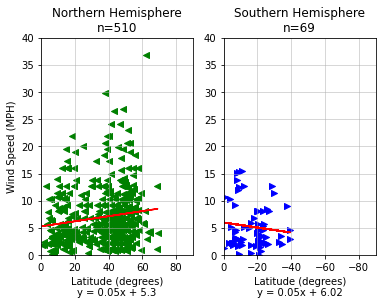

These linear regressions are modelling that wind speeds increase the further from the equator a location is, more strongly in the Southern Hemisphere than Northern.


In [43]:
# d Create scatterplots for windiness vs latitude in Northern and Southern Hemispheres

# Set height of y axis in both graphs
yLimMax = 40

# create a set of subplots one row tall x two columns wide 
plt.subplots(1,2)

NyValues = NoHemWeatherDataDF.loc[:, "Wind Speed"]
plt.subplot(1, 2, 1)
plt.scatter(NxValues, NyValues, marker="<", color="green")
plt.xlim(0, 90)
plt.ylim(0, yLimMax)
plt.title(f"Northern Hemisphere\nn={Nn}")
plt.ylabel('Wind Speed (MPH)')
plt.grid(axis = "x", linewidth = 0.5)
plt.grid(axis = "y", linewidth = 0.5)

# now do linear regression
(Nslope, Nintercept, Nrvalue, Npvalue, Nstderr) = linregress(NxValues, NyValues)
Nline_eq = "y = " + str(round(Nslope,2)) + "x + " + str(round(Nintercept,2))
plt.xlabel(f"Latitude (degrees)\n{Nline_eq}")
Nregress_values = np.asarray(Nslope) * NxValues + Nintercept
plt.plot(NxValues,Nregress_values,"r-")

SyValues = SoHemWeatherDataDF.loc[:, "Wind Speed"]
plt.subplot(1, 2, 2)
plt.scatter(SxValues, SyValues, marker=">", color="blue")
plt.xlim(0, -90)
plt.ylim(0, yLimMax)
plt.title(f"Southern Hemisphere\nn={Sn}")
plt.grid(axis = "x", linewidth = 0.5)
plt.grid(axis = "y", linewidth = 0.5)

# now do linear regression
(Sslope, Sintercept, Srvalue, Spvalue, Sstderr) = linregress(SxValues, SyValues)
Sline_eq = "y = " + str(round(Sslope,2)) + "x + " + str(round(Sintercept,2))
plt.xlabel(f"Latitude (degrees)\n{Sline_eq}")
Sregress_values = np.asarray(Sslope) * SxValues + Sintercept
plt.plot(SxValues,Sregress_values,"r-")

#and show the whole thing
plt.savefig("WindLatNoSoHemispheres.png")
plt.show()

print("These linear regressions are modelling that wind speeds increase the further from the equator a location is, more strongly in the Southern Hemisphere than Northern.")

In [37]:
# Your final notebook must:
# a-Randomly select at least 500 unique (non-repeat) cities
#  based on latitude and longitude.
# b-Perform a weather check on each of the cities
#  using a series of successive API calls.
# c-Include a print log of each city as it's being processed
#  with the city number and city name.
# d-Save a CSV of all retrieved data and
#  a PNG image for each scatter plot.

In [46]:
# For Part I, you must include a written description of
# three observable trends based on the data.
print("1. There are more datapoints from the Northern Hemisphere than Southern. This is not surprising because more of the Earth's landmass is in the Northern Hemisphere than Southern. Similarly, Northern Hemisphere datapoints extend further toward the North Pole than Southern Hemisphere datapoints do to toward the South Pole, which is also explained by a look at the map.\n2. Temperatures increase at latitudes closer to the equator and decrease at latitudes further from the equator.\n3. In the Northern Hemisphere, relative humidity increases at latitudes closer to the North Pole while, in the Southern Hemisphere, relative humidity decreases at latitudes closer to the South Pole.")

1. There are more datapoints from the Northern Hemisphere than Southern. This is not surprising because more of the Earth's landmass is in the Northern Hemisphere than Southern. Similarly, Northern Hemisphere datapoints extend further toward the North Pole than Southern Hemisphere datapoints do to toward the South Pole, which is also explained by a look at the map.
2. Temperatures increase at latitudes closer to the equator and decrease at latitudes further from the equator.
3. In the Northern Hemisphere, relative humidity increases at latitudes closer to the North Pole while, in the Southern Hemisphere, relative humidity decreases at latitudes closer to the South Pole.
